In [1]:
%load_ext autoreload
%autoreload 2
from matplotlib import pyplot
import numpy
from scipy.linalg import solve_triangular
import sys
sys.path.append('../src/')
from gaussian_measures import *

### General Form of a Gaussian

$p(x) = \exp(-\frac{1}{2}x^\top\Lambda x + x^\top\nu - \ln Z)$

with $\ln Z = \frac{1}{2}\nu^\top\Lambda^{-1}\nu + \frac{D}{2}\ln 2\pi + \frac{1}{2}\ln\det(\Lambda^{-1})$.

### Relation to covariance and mean

$\Sigma = \Lambda^{-1}$

$\mu = \Sigma\nu$

### Form of unnormalised Gaussians

$u(x) = \exp(-\frac{1}{2}x^\top\Lambda x + x^\top\nu + \ln \beta)$

And the intergal is

$\int u(x) d x = \beta Z$

### List of intergals

### Test for 1 D

In [2]:
R, D, R1 = 2, 1, 1
rand_nums = numpy.random.randn(D,D)
Sigma_phi = .5 * numpy.dot(rand_nums, rand_nums.T) + D * numpy.eye(D)
Sigma_phi = numpy.tile(Sigma_phi, (R, 1, 1))
mu_phi = numpy.random.randn(R, D)
phi = GaussianDensity(Sigma=Sigma_phi, mu=mu_phi)

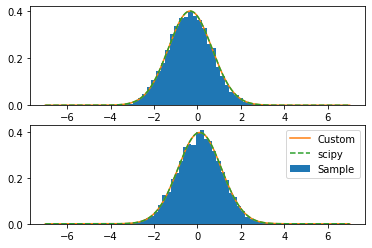

In [3]:
from scipy.stats import norm

xrange = numpy.linspace(-7,7,1000)
for ir in range(R):
    pyplot.subplot(R, 1, ir+1)
    scipy_gauss = norm.pdf(xrange, loc=mu_phi[ir], scale=numpy.sqrt(Sigma_phi[ir,0,0]))
    pyplot.hist(phi.sample(10000)[:,ir], bins=40, density=True, label='Sample')
    pyplot.plot(xrange, phi.evaluate(numpy.array([xrange]).T)[ir], label='Custom')
    pyplot.plot(xrange, scipy_gauss, '--', label='scipy')
pyplot.legend()
pyplot.show()

### Test for integral linear integrals

$\int x du(x)$

In [4]:
R, D, R1 = 10, 3, 1
rand_nums = numpy.random.randn(D,D)
Sigma_phi = .5 * numpy.dot(rand_nums, rand_nums.T) + D * numpy.eye(D)
Sigma_phi = numpy.tile(Sigma_phi, (R, 1, 1))
mu_phi = numpy.random.randn(R, D)
phi = GaussianDensity(Sigma=Sigma_phi, mu=mu_phi)

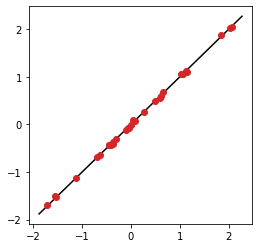

In [5]:
x_sample = numpy.mean(phi.sample(10000), axis=0)
pyplot.figure(figsize=(4,4))
pyplot.plot([1.1 * numpy.amin(x_sample), 1.1 * numpy.amax(x_sample)], [1.1 * numpy.amin(x_sample), 1.1 * numpy.amax(x_sample)] ,'k')
pyplot.plot(x_sample.flatten(), phi.intergrate_x().flatten(), 'C3o')

$\int Ax + b du(x)$

In [6]:
k = 6
A_mat, a_vec = numpy.random.randn(k,D), numpy.random.randn(k)
x_sample = phi.sample(10000)
Ax_a_sample = numpy.mean(numpy.einsum('ab,cdb->cda', A_mat, x_sample) + a_vec, axis=0)
Ax_a_phi = phi.integrate_general_linear(A_mat, a_vec)

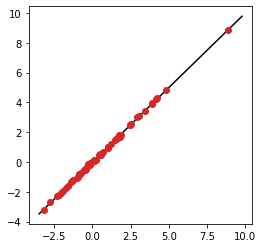

In [7]:
pyplot.figure(figsize=(4,4))
pyplot.plot([1.1 * numpy.amin(Ax_a_sample), 1.1 * numpy.amax(Ax_a_sample)], [1.1 * numpy.amin(Ax_a_sample), 1.1 * numpy.amax(Ax_a_sample)] ,'k')
pyplot.plot(Ax_a_sample.flatten(), Ax_a_phi.flatten(), 'C3o')

### Test for quadratic intergal

$\int xx^\top du(x)$

In [8]:
R, D, R1 = 20, 2, 1
rand_nums = numpy.random.randn(D,D)
Sigma_phi = numpy.dot(rand_nums, rand_nums.T) + D * numpy.eye(D)
Sigma_phi = numpy.tile(Sigma_phi, (R, 1, 1))
mu_phi = numpy.random.randn(R, D)
phi = GaussianDensity(Sigma=Sigma_phi, mu=mu_phi)

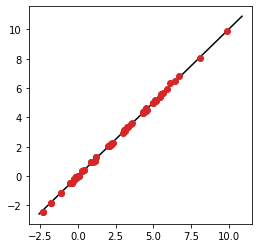

In [9]:
x_sample = phi.sample(10000)
x2_sample = numpy.mean(x_sample[:,:,None] * x_sample[:,:,:,None], axis=0)
pyplot.figure(figsize=(4,4))
pyplot.plot([1.1 * numpy.amin(x2_sample), 1.1 * numpy.amax(x2_sample)], [1.1 * numpy.amin(x2_sample), 1.1 * numpy.amax(x2_sample)] ,'k')
pyplot.plot(x2_sample.flatten(), phi.intergrate_xxT().flatten(), 'C3o')

$\int (Ax+a)^\top (Bx+b) du(x)$

In [10]:
k = 6
A_mat, a_vec = numpy.random.randn(k,D), numpy.random.randn(k)
B_mat, b_vec = numpy.random.randn(k,D), numpy.random.randn(k)
x_sample = phi.sample(10000)
Ax_a_sample = numpy.einsum('ab,cdb->cda', A_mat, x_sample) + a_vec
Bx_b_sample = numpy.einsum('ab,cdb->cda', B_mat, x_sample) + b_vec
AB_sample = numpy.mean(numpy.einsum('abc,abc->ab', Ax_a_sample, Bx_b_sample), axis=0)
AB_phi = phi.integrate_general_quadratic_inner(A_mat, a_vec, B_mat, b_vec)

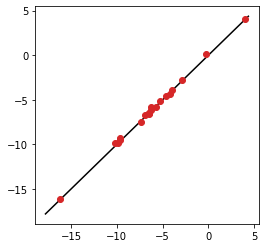

In [11]:
pyplot.figure(figsize=(4,4))
pyplot.plot([1.1 * numpy.amin(AB_sample), 1.1 * numpy.amax(AB_sample)], [1.1 * numpy.amin(AB_sample), 1.1 * numpy.amax(AB_sample)] ,'k')
pyplot.plot(AB_sample.flatten(), AB_phi.flatten(), 'C3o')

In [12]:
k, l = 6, 3
A_mat, a_vec = numpy.random.randn(k,D), numpy.random.randn(k)
B_mat, b_vec = numpy.random.randn(l,D), numpy.random.randn(l)
x_sample = phi.sample(10000)
Ax_a_sample = numpy.einsum('ab,cdb->cda', A_mat, x_sample) + a_vec
Bx_b_sample = numpy.einsum('ab,cdb->cda', B_mat, x_sample) + b_vec
AB_sample = numpy.mean(numpy.einsum('abc,abd->abcd', Ax_a_sample, Bx_b_sample), axis=0)
AB_phi = phi.integrate_general_quadratic_outer(A_mat, a_vec, B_mat, b_vec)

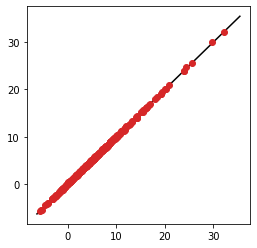

In [13]:
pyplot.figure(figsize=(4,4))
pyplot.plot([1.1 * numpy.amin(AB_sample), 1.1 * numpy.amax(AB_sample)], [1.1 * numpy.amin(AB_sample), 1.1 * numpy.amax(AB_sample)] ,'k')
pyplot.plot(AB_sample.flatten(), AB_phi.flatten(), 'C3o')

### Test for cubic intergal

$\int xb^\top xx^\top du(x)$

In [14]:
R, D, R1 = 10, 5, 1
rand_nums = numpy.random.randn(D,D)
Sigma_phi = numpy.dot(rand_nums, rand_nums.T) + D * numpy.eye(D)
Sigma_phi = numpy.tile(Sigma_phi, (R, 1, 1))
mu_phi =numpy.random.randn(R, D)
phi = GaussianDensity(Sigma=Sigma_phi, mu=mu_phi)
b = numpy.random.randn(D)

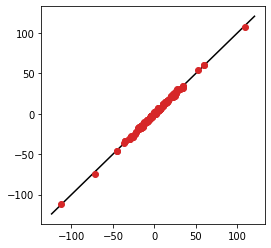

In [15]:
pyplot.figure(figsize=(4,4))
x_sample = phi.sample(10000)
Sigma_mumu_samples = x_sample[:,:,:,None] * x_sample[:,:,None]
xbxx_sample = numpy.mean(x_sample[:,:,:,None] * numpy.sum(b[None,None,:,None] * Sigma_mumu_samples, axis=2)[:,:,None], axis=0)
xbxx_phi = phi.intergate_xbxx(b)
pyplot.plot([1.1 * numpy.amin(xbxx_sample), 1.1 * numpy.amax(xbxx_sample)], [1.1 * numpy.amin(xbxx_sample), 1.1 * numpy.amax(xbxx_sample)] ,'k')
pyplot.plot(xbxx_sample.flatten(), xbxx_phi.flatten(), 'C3o')

$\int xAx^\top xd u(x)$

In [16]:
A_mat = numpy.random.randn(D,D)
#A_mat = A_mat + A_mat.T
x_sample = phi.sample(10000)
xx_sample = numpy.einsum('abc,abc->ab', x_sample, x_sample)
xA_sample = numpy.einsum('abc,cd->abd', x_sample, A_mat)
xAxx_sample = numpy.mean(xA_sample * xx_sample[:,:,None], axis=0)
xAxx_phi = phi._expectation_xAxx(A_mat)

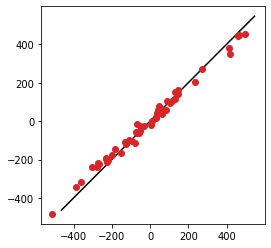

In [17]:
pyplot.figure(figsize=(4,4))
pyplot.plot([.9 * numpy.amin(xAxx_sample), 1.1 * numpy.amax(xAxx_sample)], [.9 * numpy.amin(xAxx_sample), 1.1 * numpy.amax(xAxx_sample)] ,'k')
pyplot.plot(xAxx_sample.flatten(), xAxx_phi.flatten(), 'C3o')

$\int (Ax+a)(Bx+b)^\top(Cx+c) du(x)$

In [18]:
k, l = D, 3
A_mat, a_vec = numpy.random.randn(k,D), numpy.random.randn(k)
B_mat, b_vec = numpy.random.randn(l,D), numpy.random.randn(l)
C_mat, c_vec = numpy.random.randn(l,D), numpy.random.randn(l)
x_sample = phi.sample(10000)
Ax_a_sample = numpy.einsum('ab,cdb->cda', A_mat, x_sample) + a_vec
Bx_b_sample = numpy.einsum('ab,cdb->cda', B_mat, x_sample) + b_vec
Cx_c_sample = numpy.einsum('ab,cdb->cda', C_mat, x_sample) + c_vec
ABC_sample = numpy.mean(Ax_a_sample * numpy.einsum('abc,abc->ab', Bx_b_sample, Cx_c_sample)[:,:,None], axis=0)
ABC_phi = phi.integrate_general_cubic_inner(A_mat, a_vec, B_mat, b_vec, C_mat, c_vec)

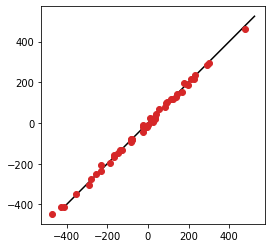

In [19]:
pyplot.figure(figsize=(4,4))
pyplot.plot([.9 * numpy.amin(ABC_sample), 1.1 * numpy.amax(ABC_sample)], [.9 * numpy.amin(ABC_sample), 1.1 * numpy.amax(ABC_sample)] ,'k')
pyplot.plot(ABC_sample.flatten(), ABC_phi.flatten(), 'C3o')

$\int (Ax+a)^\top(Bx+b)(Cx+c)^\top du(x)$

In [20]:
k, l = D, 3
A_mat, a_vec = numpy.random.randn(l,D), numpy.random.randn(l)
B_mat, b_vec = numpy.random.randn(l,D), numpy.random.randn(l)
C_mat, c_vec = numpy.random.randn(k,D), numpy.random.randn(k)
x_sample = phi.sample(10000)
Ax_a_sample = numpy.einsum('ab,cdb->cda', A_mat, x_sample) + a_vec
Bx_b_sample = numpy.einsum('ab,cdb->cda', B_mat, x_sample) + b_vec
Cx_c_sample = numpy.einsum('ab,cdb->cda', C_mat, x_sample) + c_vec
ABC_sample = numpy.mean(numpy.einsum('abc,abcd->abd', Ax_a_sample, numpy.einsum('abc,abd->abcd', Bx_b_sample, Cx_c_sample)), axis=0)
ABC_phi = phi.integrate_general_cubic_outer(A_mat, a_vec, B_mat, b_vec, C_mat, c_vec)

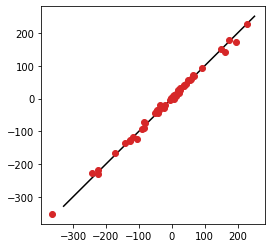

In [21]:
pyplot.figure(figsize=(4,4))
pyplot.plot([.9 * numpy.amin(ABC_sample), 1.1 * numpy.amax(ABC_sample)], [.9 * numpy.amin(ABC_sample), 1.1 * numpy.amax(ABC_sample)] ,'k')
pyplot.plot(ABC_sample.flatten(), ABC_phi.flatten(), 'C3o')

## Test quartic integrals

$\int xx^\top xx^\top du(x)$ 

In [22]:
R, D, R1 = 100, 5, 1
rand_nums = numpy.random.randn(D,D)
Sigma_phi = numpy.dot(rand_nums, rand_nums.T) + D * numpy.eye(D)
Sigma_phi = numpy.tile(Sigma_phi, (R, 1, 1))
mu_phi = numpy.random.randn(R, D)
phi = GaussianDensity(Sigma=Sigma_phi, mu=mu_phi)

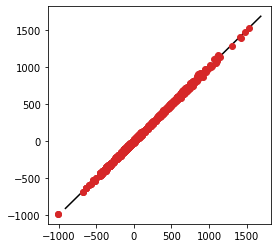

In [23]:
pyplot.figure(figsize=(4,4))
x_sample = phi.sample(10000)
Sigma_mumu_samples = x_sample[:,:,None] * x_sample[:,:,:,None]
xxxx_sample = numpy.mean(numpy.einsum('abcd,abde->abce', Sigma_mumu_samples, Sigma_mumu_samples), axis=0)
xxxx_phi = phi.integrate_xxTxxT()
pyplot.plot([.9 * numpy.amin(xxxx_sample), 1.1 * numpy.amax(xxxx_sample)], [.9 * numpy.amin(xxxx_sample), 1.1 * numpy.amax(xxxx_sample)] ,'k')
pyplot.plot(xxxx_sample.flatten(), xxxx_phi.flatten(), 'C3o')

$\int xx^\top A xx^\top du(x)$ 

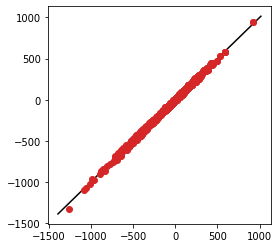

In [24]:
A = numpy.random.randn(D,D)
x_sample = phi.sample(10000)
Sigma_mumu_samples = x_sample[:,:,None] * x_sample[:,:,:,None]
xxA = numpy.einsum('abcd,de->abce', Sigma_mumu_samples, A)
xxAxx_sample = numpy.mean(numpy.einsum('abcd,abde->abce', xxA, Sigma_mumu_samples), axis=0)
xxAxx_phi = phi.integrate_xxTAxxT(A)
pyplot.figure(figsize=(4,4))
pyplot.plot([1.1 * numpy.amin(xxAxx_sample), 1.1 * numpy.amax(xxAxx_sample)], [1.1 * numpy.amin(xxAxx_sample), 1.1 * numpy.amax(xxAxx_sample)] ,'k')
pyplot.plot(xxAxx_sample.flatten(), xxAxx_phi.flatten(), 'C3o')

$\int (Ax+a)(Bx+b)^\top(Cx+c)(Dx+d)^\top du(x)$ 

In [25]:
m,l,k = 4,6,8
A_mat, a_vec = numpy.random.randn(m,D), numpy.random.rand(m)
B_mat, b_vec = numpy.random.randn(l,D), numpy.random.rand(l)
C_mat, c_vec = numpy.random.randn(l,D), numpy.random.rand(l)
D_mat, d_vec = numpy.random.randn(k,D), numpy.random.rand(k)

x_sample = phi.sample(10000)
Ax_a_sample = numpy.einsum('ab,cdb->cda', A_mat, x_sample) + a_vec
Bx_b_sample = numpy.einsum('ab,cdb->cda', B_mat, x_sample) + b_vec
Cx_c_sample = numpy.einsum('ab,cdb->cda', C_mat, x_sample) + c_vec
Dx_d_sample = numpy.einsum('ab,cdb->cda', D_mat, x_sample) + d_vec
AB_sample = numpy.einsum('abc,abd->abcd', Ax_a_sample, Bx_b_sample)
CD_sample = numpy.einsum('abc,abd->abcd', Cx_c_sample, Dx_d_sample)
ABCD_sample = numpy.mean(numpy.einsum('abcd,abde->abce', AB_sample, CD_sample), axis=0)
ABCD_phi = phi.integrate_general_quartic_outer(A_mat, a_vec, B_mat, b_vec, C_mat, c_vec, D_mat, d_vec)

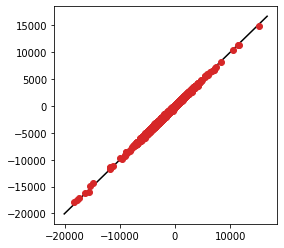

In [26]:
pyplot.figure(figsize=(4,4))
pyplot.plot([1.1 * numpy.amin(ABCD_sample), 1.1 * numpy.amax(ABCD_sample)], [1.1 * numpy.amin(ABCD_sample), 1.1 * numpy.amax(ABCD_sample)] ,'k')
pyplot.plot(ABCD_sample.flatten(), ABCD_phi.flatten(), 'C3o')

$\int (Ax+a)^\top(Bx+b)(Cx+c)^\top(Dx+d) du(x)$ 

In [27]:

m,l = 10,12
A_mat, a_vec = numpy.random.randn(m,D), numpy.random.rand(m)
B_mat, b_vec = numpy.random.randn(m,D), numpy.random.rand(m)
C_mat, c_vec = numpy.random.randn(l,D), numpy.random.rand(l)
D_mat, d_vec = numpy.random.randn(l,D), numpy.random.rand(l)

x_sample = phi.sample(10000)
Ax_a_sample = numpy.einsum('ab,cdb->cda', A_mat, x_sample) + a_vec
Bx_b_sample = numpy.einsum('ab,cdb->cda', B_mat, x_sample) + b_vec
Cx_c_sample = numpy.einsum('ab,cdb->cda', C_mat, x_sample) + c_vec
Dx_d_sample = numpy.einsum('ab,cdb->cda', D_mat, x_sample) + d_vec
AB_sample = numpy.einsum('abc,abc->ab', Ax_a_sample, Bx_b_sample)
CD_sample = numpy.einsum('abc,abc->ab', Cx_c_sample, Dx_d_sample)
ABCD_sample = numpy.mean(AB_sample * CD_sample, axis=0)
ABCD_phi = phi.integrate_general_quartic_inner(A_mat, a_vec, B_mat, b_vec, C_mat, c_vec, D_mat, d_vec)

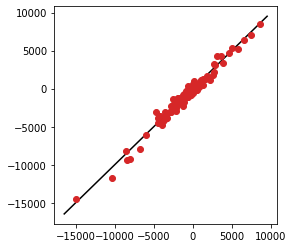

In [28]:
pyplot.figure(figsize=(4,4))
pyplot.plot([1.1 * numpy.amin(ABCD_sample), 1.1 * numpy.amax(ABCD_sample)], [1.1 * numpy.amin(ABCD_sample), 1.1 * numpy.amax(ABCD_sample)] ,'k')
pyplot.plot(ABCD_sample.flatten(), ABCD_phi.flatten(), 'C3o')

## Test 2 Dimensional

In [29]:
R, D, R1 = 1, 2, 1
rand_nums = numpy.random.randn(D,D)
Sigma_phi = 5. * numpy.ones((D,D))
Sigma_phi += 1e-1*numpy.eye(D)

Sigma_phi = numpy.tile(Sigma_phi, (R, 1, 1))
mu_phi = numpy.zeros((R, D))
mu_phi[0,0] = 2 
phi = GaussianDensity(Sigma=Sigma_phi, mu=mu_phi)
x_samples = phi.sample(100000)
numpy_samples = numpy.random.multivariate_normal(mu_phi[0], Sigma_phi[0], 100000)

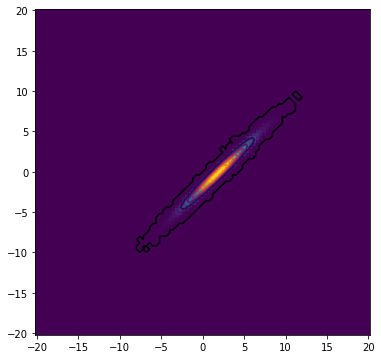

In [30]:
pyplot.figure(figsize=(6,6))
xrange = numpy.linspace(-20,20,100)
xmesh, ymesh = numpy.meshgrid(xrange, xrange)
x_grid = numpy.vstack([xmesh.flatten(), ymesh.flatten()])
density = phi.evaluate(x_grid.T)[0].reshape((100,100))
hist, xedges, yedges =  numpy.histogram2d(x_samples[:,0,1], x_samples[:,0,0], range=[[-20,20], [-20,20]], bins=100)
numpy_hist, xedges, yedges =  numpy.histogram2d(numpy_samples[:,1], numpy_samples[:,0], range=[[-20,20], [-20,20]], bins=100)
ax1 = pyplot.subplot(111)
pyplot.pcolor(xrange, xrange, density, shading='auto')
#pyplot.pcolor(xedges[:-1], yedges[:-1], numpy_hist, shading='auto')
pyplot.contour(xedges[:-1], yedges[:-1], hist, cmap='inferno')
pyplot.show()

## Test adding Terms and then integrating

In [31]:
%load_ext autoreload
%autoreload 2
from matplotlib import pyplot
import numpy
from scipy.linalg import solve_triangular
import sys
sys.path.append('../src/')
from gaussian_measures import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
R, D = 100, 2
rand_nums = numpy.random.randn(D,D)
Sigma_phi = numpy.dot(rand_nums, rand_nums.T) + D * numpy.eye(D)
#Sigma_phi = 10 * numpy.eye(D)
#Sigma_phi = 5. * numpy.ones((D,D))
#Sigma_phi += 1e-1*numpy.eye(D)
Sigma_phi = numpy.tile(Sigma_phi, (R, 1, 1))
mu_phi = numpy.random.randn(R, D)

$\int \beta d \phi(x)$

In [33]:
phi = GaussianDensity(Sigma=Sigma_phi, mu=mu_phi)
R2 = 2
ln_beta = numpy.random.randn(R2)
u = phi.multiply_constant_term(ln_beta)
numpy.allclose(u.integral(), numpy.exp(numpy.tile(ln_beta[None], (R, 1)).reshape(R * R2)))

True

$\ln \int \beta \exp(\nu^\top x) d \phi(x)$

In [34]:
import scipy
num_samples = 100000
phi = GaussianDensity(Sigma=Sigma_phi, mu=mu_phi)
R2 = 3
ln_beta = numpy.random.randn(R2)
nu = numpy.dot(numpy.random.randn(R2, D), phi.Lambda[0])
u = phi.multiply_linear_exponential_term(nu, ln_beta)
x_sample = phi.sample(num_samples)
xnu_sample = numpy.einsum('abc,dc->abd', x_sample, nu) 
log_integral = xnu_sample + ln_beta[None,None]
sampled_integral = scipy.special.logsumexp(log_integral, axis=0).reshape((R * R2)) - numpy.log(num_samples)
phi_term = u.log_integral()

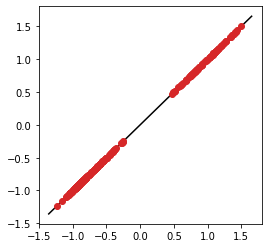

In [35]:
pyplot.figure(figsize=(4,4))
pyplot.plot([1.1 * numpy.amin(sampled_integral), 1.1 * numpy.amax(sampled_integral)], [1.1 * numpy.amin(sampled_integral), 1.1 * numpy.amax(sampled_integral)] ,'k')
pyplot.plot(sampled_integral.flatten(), phi_term.flatten(), 'C3o')

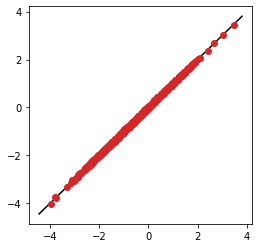

In [36]:
u_density = u.get_density()
x_sample = u_density.sample(10000)
pyplot.figure(figsize=(4,4))
pyplot.plot([1.1 * numpy.amin(u_density.mu), 1.1 * numpy.amax(u_density.mu)], [1.1 * numpy.amin(u_density.mu), 1.1 * numpy.amax(u_density.mu)] ,'k')
pyplot.plot(numpy.mean(x_sample, axis=0).flatten(), u_density.mu.flatten(), 'C3o')

$\int \beta \exp(- \frac{1}{2}x^\top\Lambda x + \nu^\top x) d \phi(x)$

In [ ]:
R, D = 100, 2
rand_nums = numpy.random.randn(D,D)
Sigma_phi = numpy.dot(rand_nums, rand_nums.T) + D * numpy.eye(D)
#Sigma_phi = numpy.eye(D)
Sigma_phi = numpy.tile(Sigma_phi, (R, 1, 1))
mu_phi = numpy.random.randn(R, D)
phi = GaussianDensity(Sigma=Sigma_phi, mu=mu_phi)
R2 = 1
ln_beta = numpy.random.randn(R2)
nu = numpy.dot(numpy.random.randn(R2, D), phi.Lambda[0])
Lambda = numpy.dot(rand_nums, rand_nums.T) + D * numpy.eye(D)
Lambda = numpy.tile(Lambda, (R2, 1, 1))

u = phi.multiply_squared_exponential_term(Lambda, nu)
x_sample = phi.sample(10000)
xLambdax_sample = numpy.einsum('abcd,abd->abc', numpy.einsum('abc,dce->abde', x_sample, Lambda), x_sample)
xnu_sample = numpy.einsum('abc,dc->abd', x_sample, nu) 
#integral = numpy.exp(-.5 * xLambdax_sample + xnu_sample + ln_beta[None,:,None])
integral = numpy.exp(-.5 * xLambdax_sample + xnu_sample)
sampled_integral = numpy.mean(integral, axis=0).reshape((R * R2))
phi_term = u.integral()

In [ ]:
pyplot.figure(figsize=(4,4))
pyplot.plot([1.1 * numpy.amin(sampled_integral), 1.1 * numpy.amax(sampled_integral)], [1.1 * numpy.amin(sampled_integral), 1.1 * numpy.amax(sampled_integral)] ,'k')
pyplot.plot(sampled_integral.flatten(), phi_term.flatten(), 'C3o')

$\int (Ax+a)(Bx+b)^\top(Cx+c)(Dx+d)^\top \beta \exp(- \frac{1}{2}x^\top\Lambda x + \nu^\top x) d \phi(x)$

In [ ]:
m,l,k = 4,6,8
A_mat, a_vec = numpy.random.randn(m,D), numpy.random.rand(m)
B_mat, b_vec = numpy.random.randn(l,D), numpy.random.rand(l)
C_mat, c_vec = numpy.random.randn(l,D), numpy.random.rand(l)
D_mat, d_vec = numpy.random.randn(k,D), numpy.random.rand(k)

Ax_a_sample = numpy.einsum('ab,cdb->cda', A_mat, x_sample) + a_vec
Bx_b_sample = numpy.einsum('ab,cdb->cda', B_mat, x_sample) + b_vec
Cx_c_sample = numpy.einsum('ab,cdb->cda', C_mat, x_sample) + c_vec
Dx_d_sample = numpy.einsum('ab,cdb->cda', D_mat, x_sample) + d_vec
AB_sample = numpy.einsum('abc,abd->abcd', Ax_a_sample, Bx_b_sample)
CD_sample = numpy.einsum('abc,abd->abcd', Cx_c_sample, Dx_d_sample)
ABCD_sample = numpy.mean(numpy.einsum('abcd,abde->abce', AB_sample, CD_sample)[:,:,None] * integral[:,:,:,None,None], axis=0).reshape((R*R2,m,k))
ABCD_phi = u.integrate_general_quartic_outer(A_mat, a_vec, B_mat, b_vec, C_mat, c_vec, D_mat, d_vec)

In [ ]:
pyplot.figure(figsize=(4,4))
pyplot.plot([1.1 * numpy.amin(ABCD_sample), 1.1 * numpy.amax(ABCD_sample)], [1.1 * numpy.amin(ABCD_sample), 1.1 * numpy.amax(ABCD_sample)] ,'k')
pyplot.plot(ABCD_sample.flatten(), ABCD_phi.flatten(), 'C3o')

$\int (Ax+a)^\top(Bx+b)(Cx+c)^\top(Dx+d) \beta \exp(- \frac{1}{2}x^\top\Lambda x + \nu^\top x) d \phi(x)$ 

In [ ]:
#u = phi.multiply_squared_exponential_term(Lambda, nu, ln_beta)

m,l = 10,12
A_mat, a_vec = numpy.random.randn(m,D), numpy.random.rand(m)
B_mat, b_vec = numpy.random.randn(m,D), numpy.random.rand(m)
C_mat, c_vec = numpy.random.randn(l,D), numpy.random.rand(l)
D_mat, d_vec = numpy.random.randn(l,D), numpy.random.rand(l)

Ax_a_sample = numpy.einsum('ab,cdb->cda', A_mat, x_sample) + a_vec
Bx_b_sample = numpy.einsum('ab,cdb->cda', B_mat, x_sample) + b_vec
Cx_c_sample = numpy.einsum('ab,cdb->cda', C_mat, x_sample) + c_vec
Dx_d_sample = numpy.einsum('ab,cdb->cda', D_mat, x_sample) + d_vec
AB_sample = numpy.einsum('abc,abc->ab', Ax_a_sample, Bx_b_sample)
CD_sample = numpy.einsum('abc,abc->ab', Cx_c_sample, Dx_d_sample)
ABCD_sample = numpy.mean((AB_sample * CD_sample)[:,:,None] * integral, axis=0).reshape((R * R2))
ABCD_phi = u.integrate_general_quartic_inner(A_mat, a_vec, B_mat, b_vec, C_mat, c_vec, D_mat, d_vec)

In [ ]:
pyplot.figure(figsize=(4,4))
pyplot.plot([1.1 * numpy.amin(ABCD_sample), 1.1 * numpy.amax(ABCD_sample)], [1.1 * numpy.amin(ABCD_sample), 1.1 * numpy.amax(ABCD_sample)] ,'k')
pyplot.plot(ABCD_sample.flatten(), ABCD_phi.flatten(), 'C3o')

### Test for rank 1 update

$\int \exp(-\frac{1}{2}x^\top UGU^\top x) d \phi(x)$

In [ ]:
R, D = 100, 2
rand_nums = numpy.random.randn(D,D)
Sigma_phi = numpy.dot(rand_nums, rand_nums.T) + D * numpy.eye(D)
Sigma_phi = numpy.tile(Sigma_phi, (R, 1, 1))
mu_phi = numpy.random.randn(R, D)
phi = GaussianDensity(Sigma=Sigma_phi, mu=mu_phi)

In [ ]:
R2 = 4
U = numpy.random.randn(R2, D)
U /= numpy.sum(U, axis=1)[:,None]
G = 20 * numpy.random.rand(R2)
Lambda = numpy.einsum('ab,ac->abc', U, G[:,None] * U)
#u = phi.multiply_rank_one(U, G)
#ln_beta = numpy.random.randn(R2)
#nu = numpy.random.randn(R2, D)
ln_beta = numpy.zeros(R2)
nu = numpy.zeros((R2, D))
u = phi.multiply_squared_exponential_term(Lambda, nu, ln_beta)
phi_term = u.integral()
x_sample = phi.sample(10000)
xLambdax_sample = numpy.einsum('abcd,abd->abc', numpy.einsum('abc,dce->abde', x_sample, Lambda), x_sample)
integral = numpy.exp(-.5 * xLambdax_sample)
sampled_integral = numpy.mean(integral, axis=0).reshape((R * R2))

In [ ]:
pyplot.figure(figsize=(4,4))
pyplot.plot([1.1 * numpy.amin(sampled_integral), 1.1 * numpy.amax(sampled_integral)], [1.1 * numpy.amin(sampled_integral), 1.1 * numpy.amax(sampled_integral)] ,'k')
pyplot.plot(sampled_integral.flatten(), phi_term.flatten(), 'C3o')

In [ ]:
m,l,k = 5,6,8
A_mat, a_vec = numpy.random.randn(m,D), numpy.random.rand(m)
B_mat, b_vec = numpy.random.randn(l,D), numpy.random.rand(l)
C_mat, c_vec = numpy.random.randn(l,D), numpy.random.rand(l)
D_mat, d_vec = numpy.random.randn(k,D), numpy.random.rand(k)

Ax_a_sample = numpy.einsum('ab,cdb->cda', A_mat, x_sample) + a_vec
Bx_b_sample = numpy.einsum('ab,cdb->cda', B_mat, x_sample) + b_vec
Cx_c_sample = numpy.einsum('ab,cdb->cda', C_mat, x_sample) + c_vec
Dx_d_sample = numpy.einsum('ab,cdb->cda', D_mat, x_sample) + d_vec
AB_sample = numpy.einsum('abc,abd->abcd', Ax_a_sample, Bx_b_sample)
CD_sample = numpy.einsum('abc,abd->abcd', Cx_c_sample, Dx_d_sample)
ABCD_sample = numpy.mean(numpy.einsum('abcd,abde->abce', AB_sample, CD_sample)[:,:,None] * integral[:,:,:,None,None], axis=0).reshape((R*R2,m,k))
#ABCD_sample = numpy.mean(numpy.einsum('abcd,abde->abce', AB_sample, CD_sample)[:,:,None], axis=0).reshape((R,m,k))
ABCD_phi = u.integrate_general_quartic_outer(A_mat, a_vec, B_mat, b_vec, C_mat, c_vec, D_mat, d_vec)

In [ ]:
pyplot.figure(figsize=(4,4))
pyplot.plot([1.1 * numpy.amin(ABCD_sample), 1.1 * numpy.amax(ABCD_sample)], [1.1 * numpy.amin(ABCD_sample), 1.1 * numpy.amax(ABCD_sample)] ,'k')
pyplot.plot(ABCD_sample.flatten(), ABCD_phi.flatten(), 'C3o')

In [ ]:
phi.ln_beta[0] + phi.lnZ[0], u.ln_beta[0] + u.lnZ[0]

In [ ]:
u.mu[0], phi.mu[0]

In [ ]:
numpy.mean(numpy.einsum('abcd,abde->abce', AB_sample, CD_sample)[:,:,None] * integral[:,:,:,None,None], axis=0).reshape((R*R2,m,k))

In [ ]:
400 * 4 * 8